# Data Visualisation 

Visualise the dataset and see if there is any outliers or highly correlated features. These visualisations can provide insights to feature engineering and feature reduction due to the low number of data and high number of features which may cause overfitting

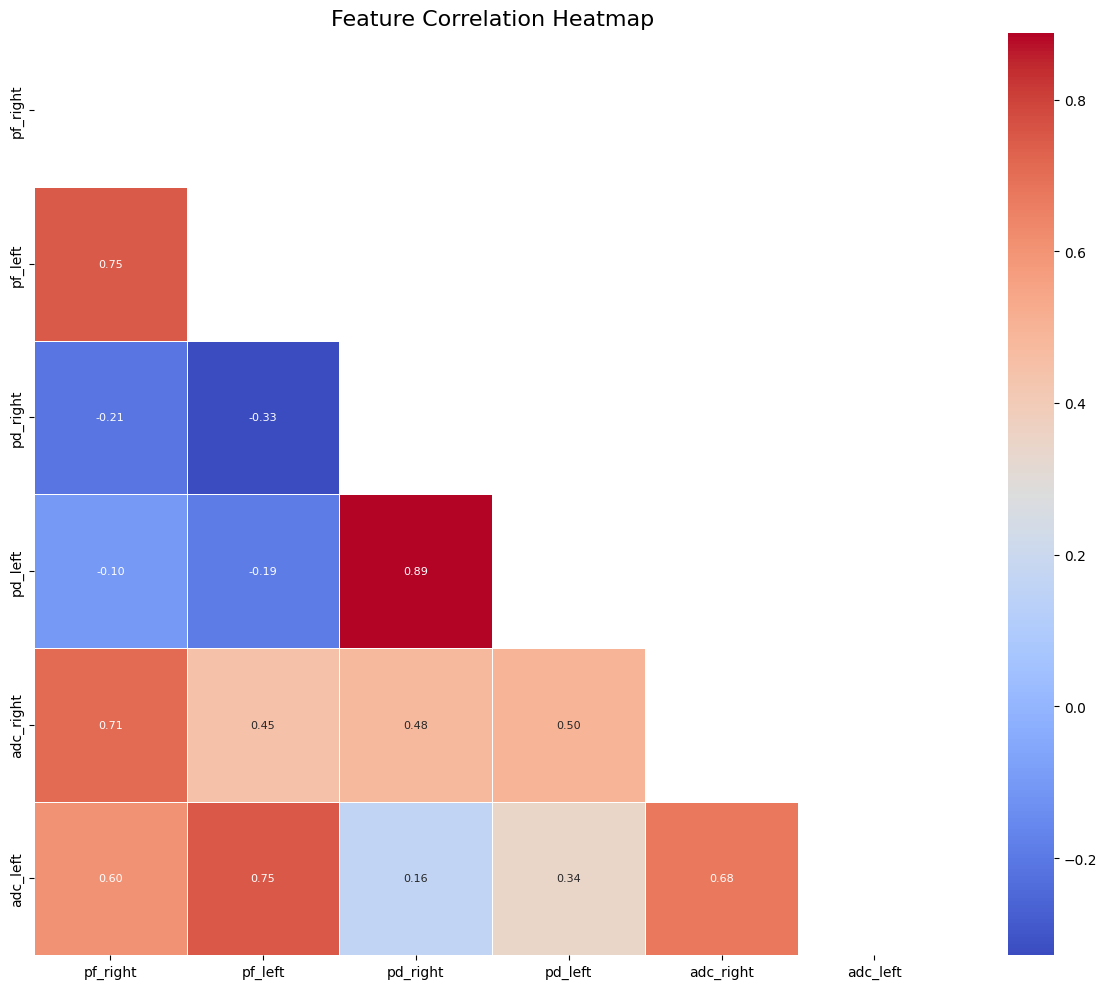

/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/1694478463.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y=feature, data=df, ax=axes[i], palette=palette)
/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/1694478463.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y=feature, data=df, ax=axes[i], palette=palette)
/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/1694478463.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y=fea

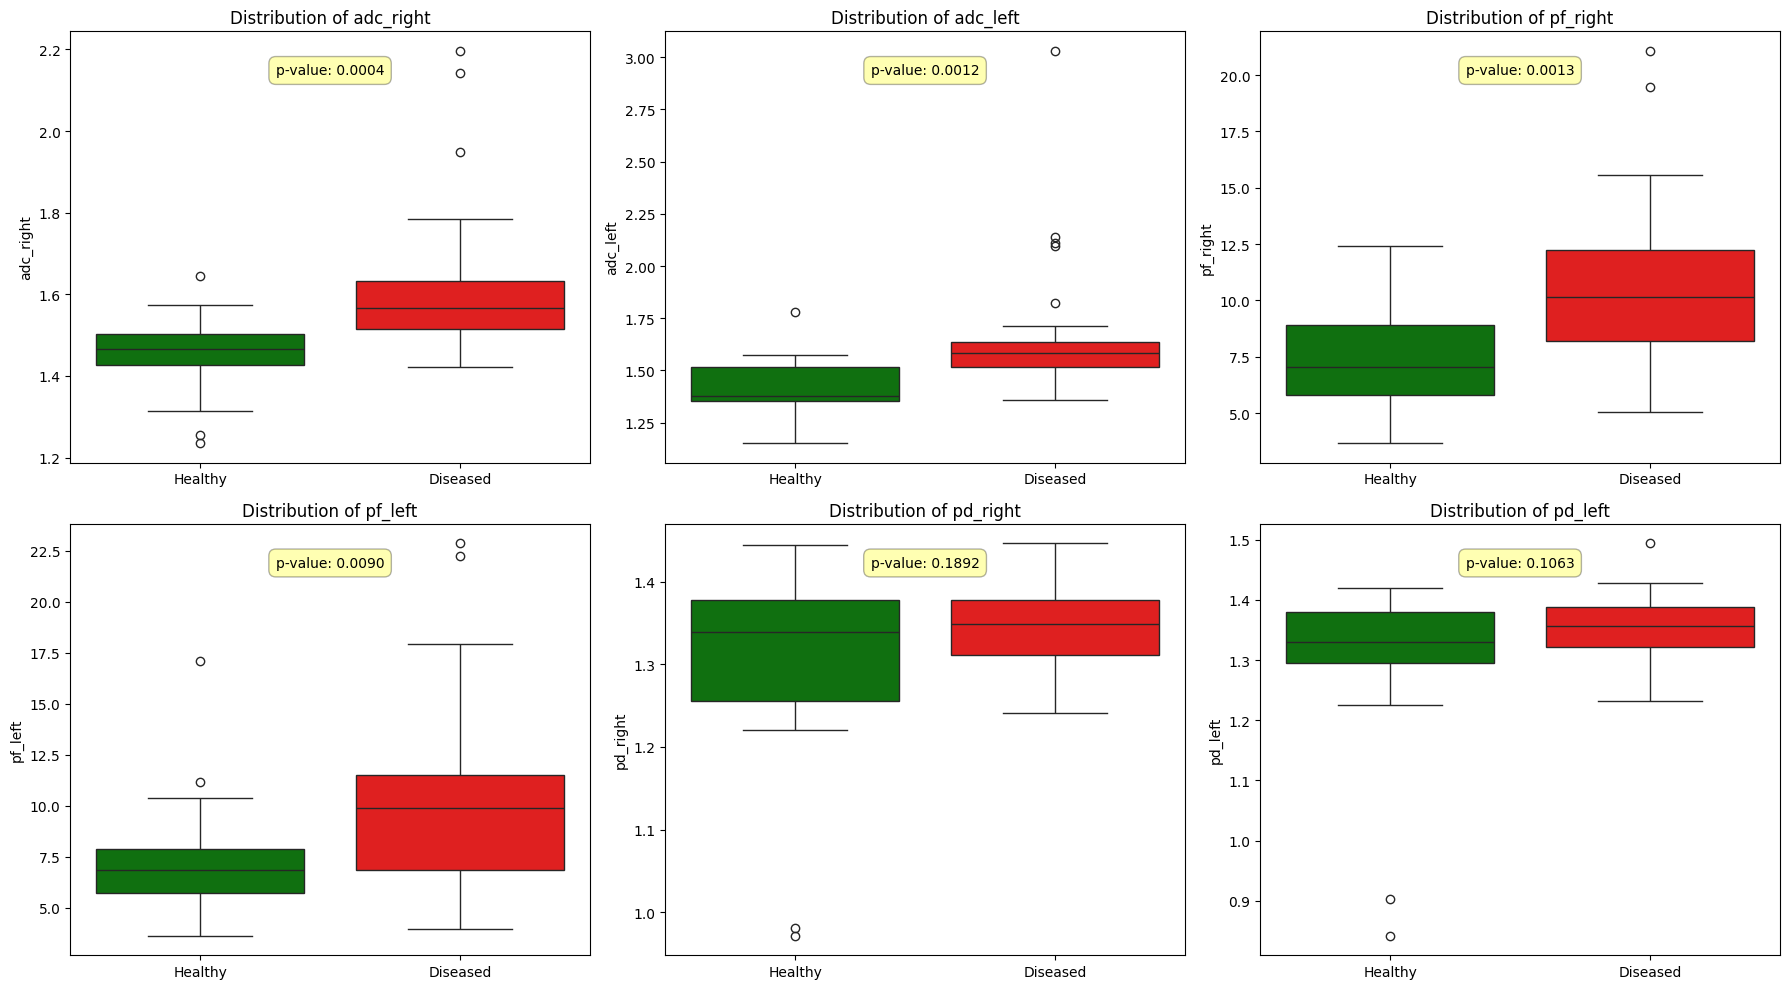

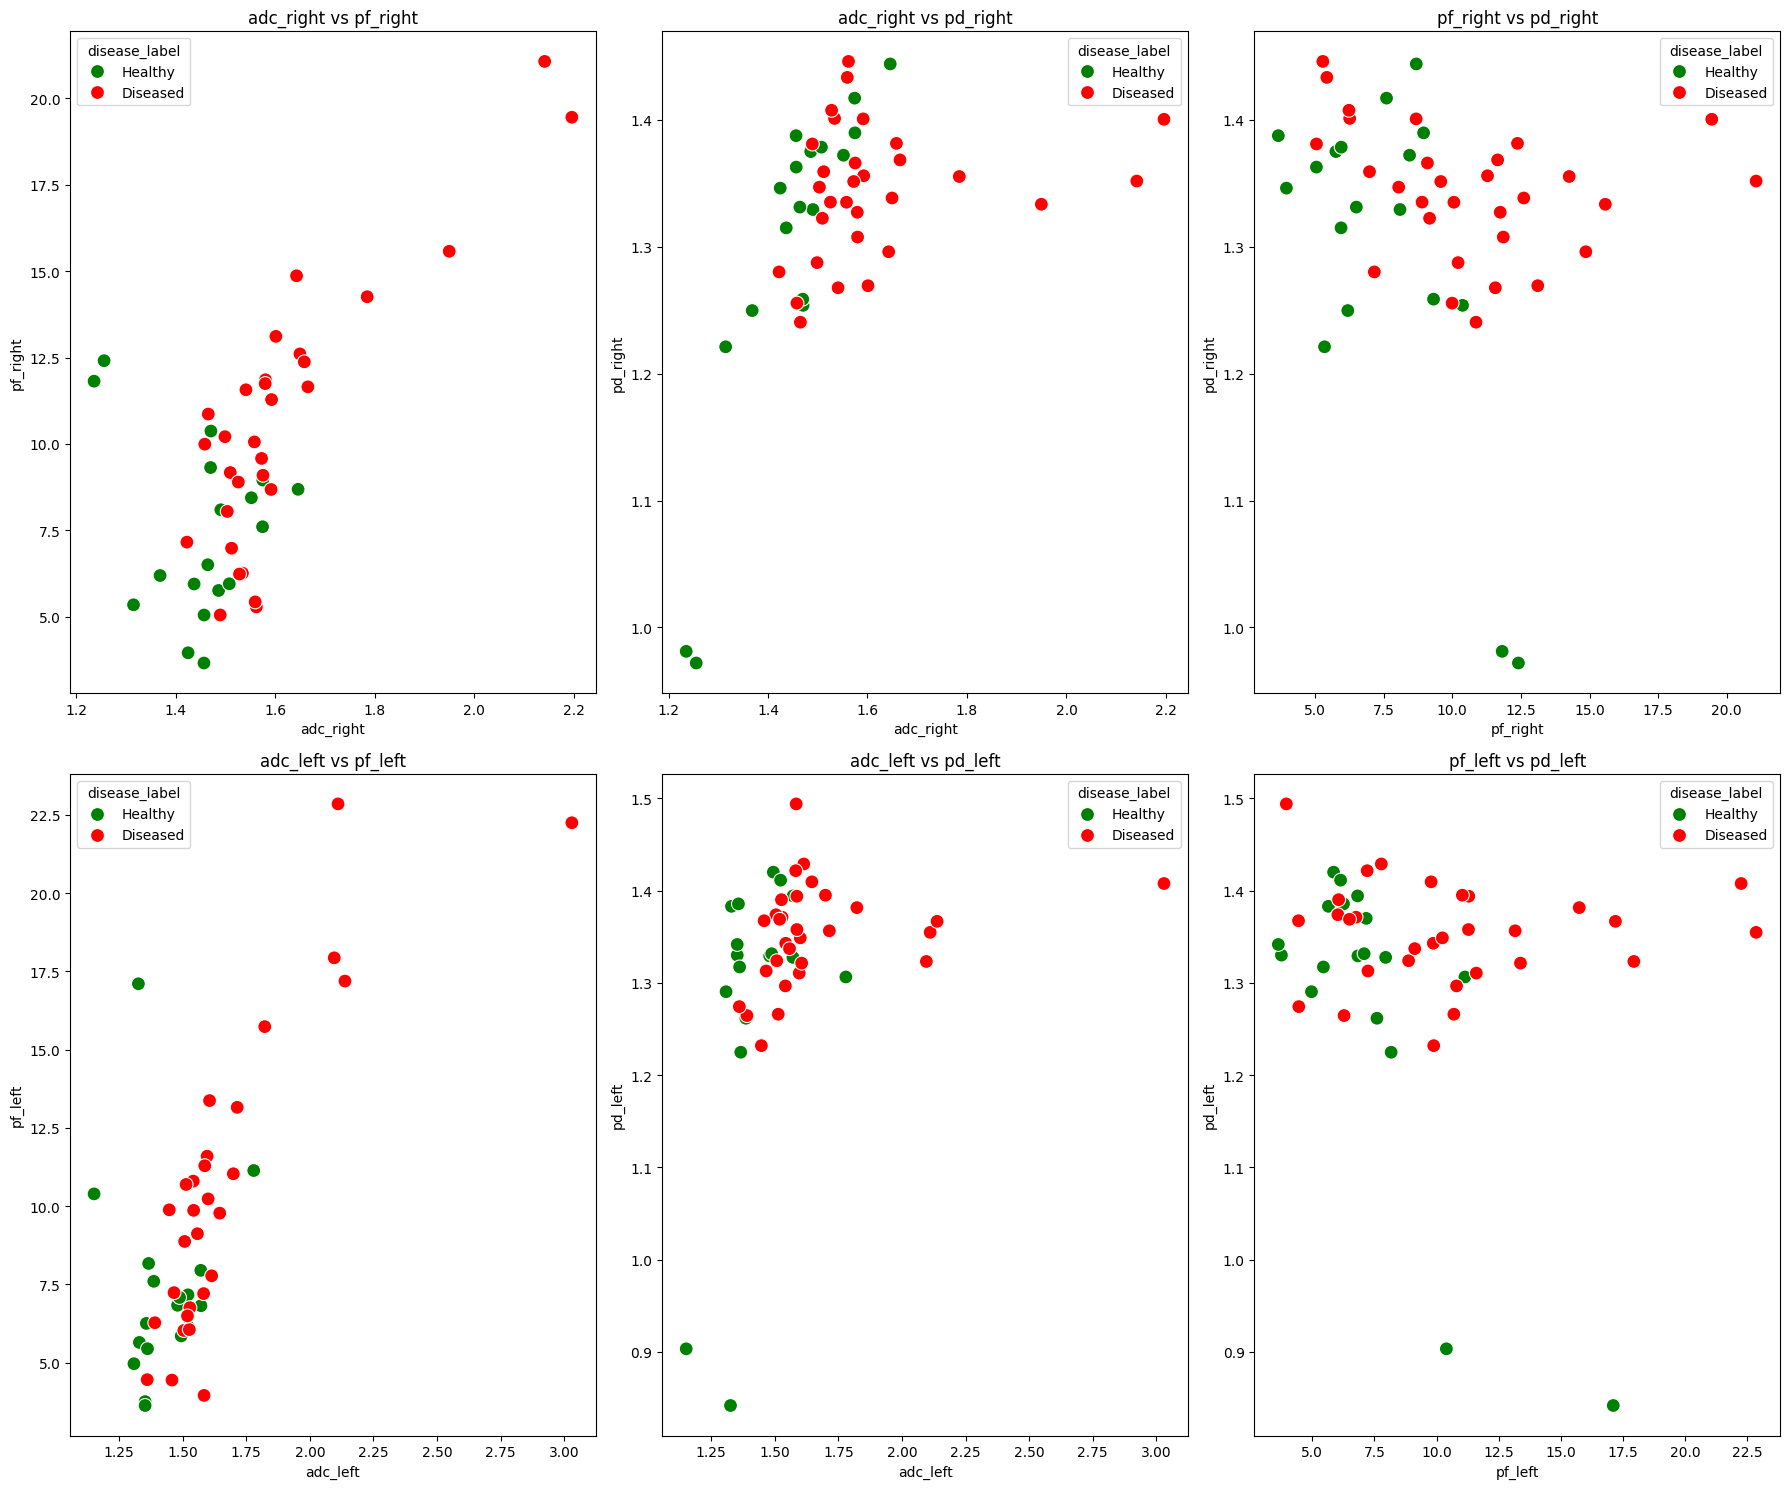

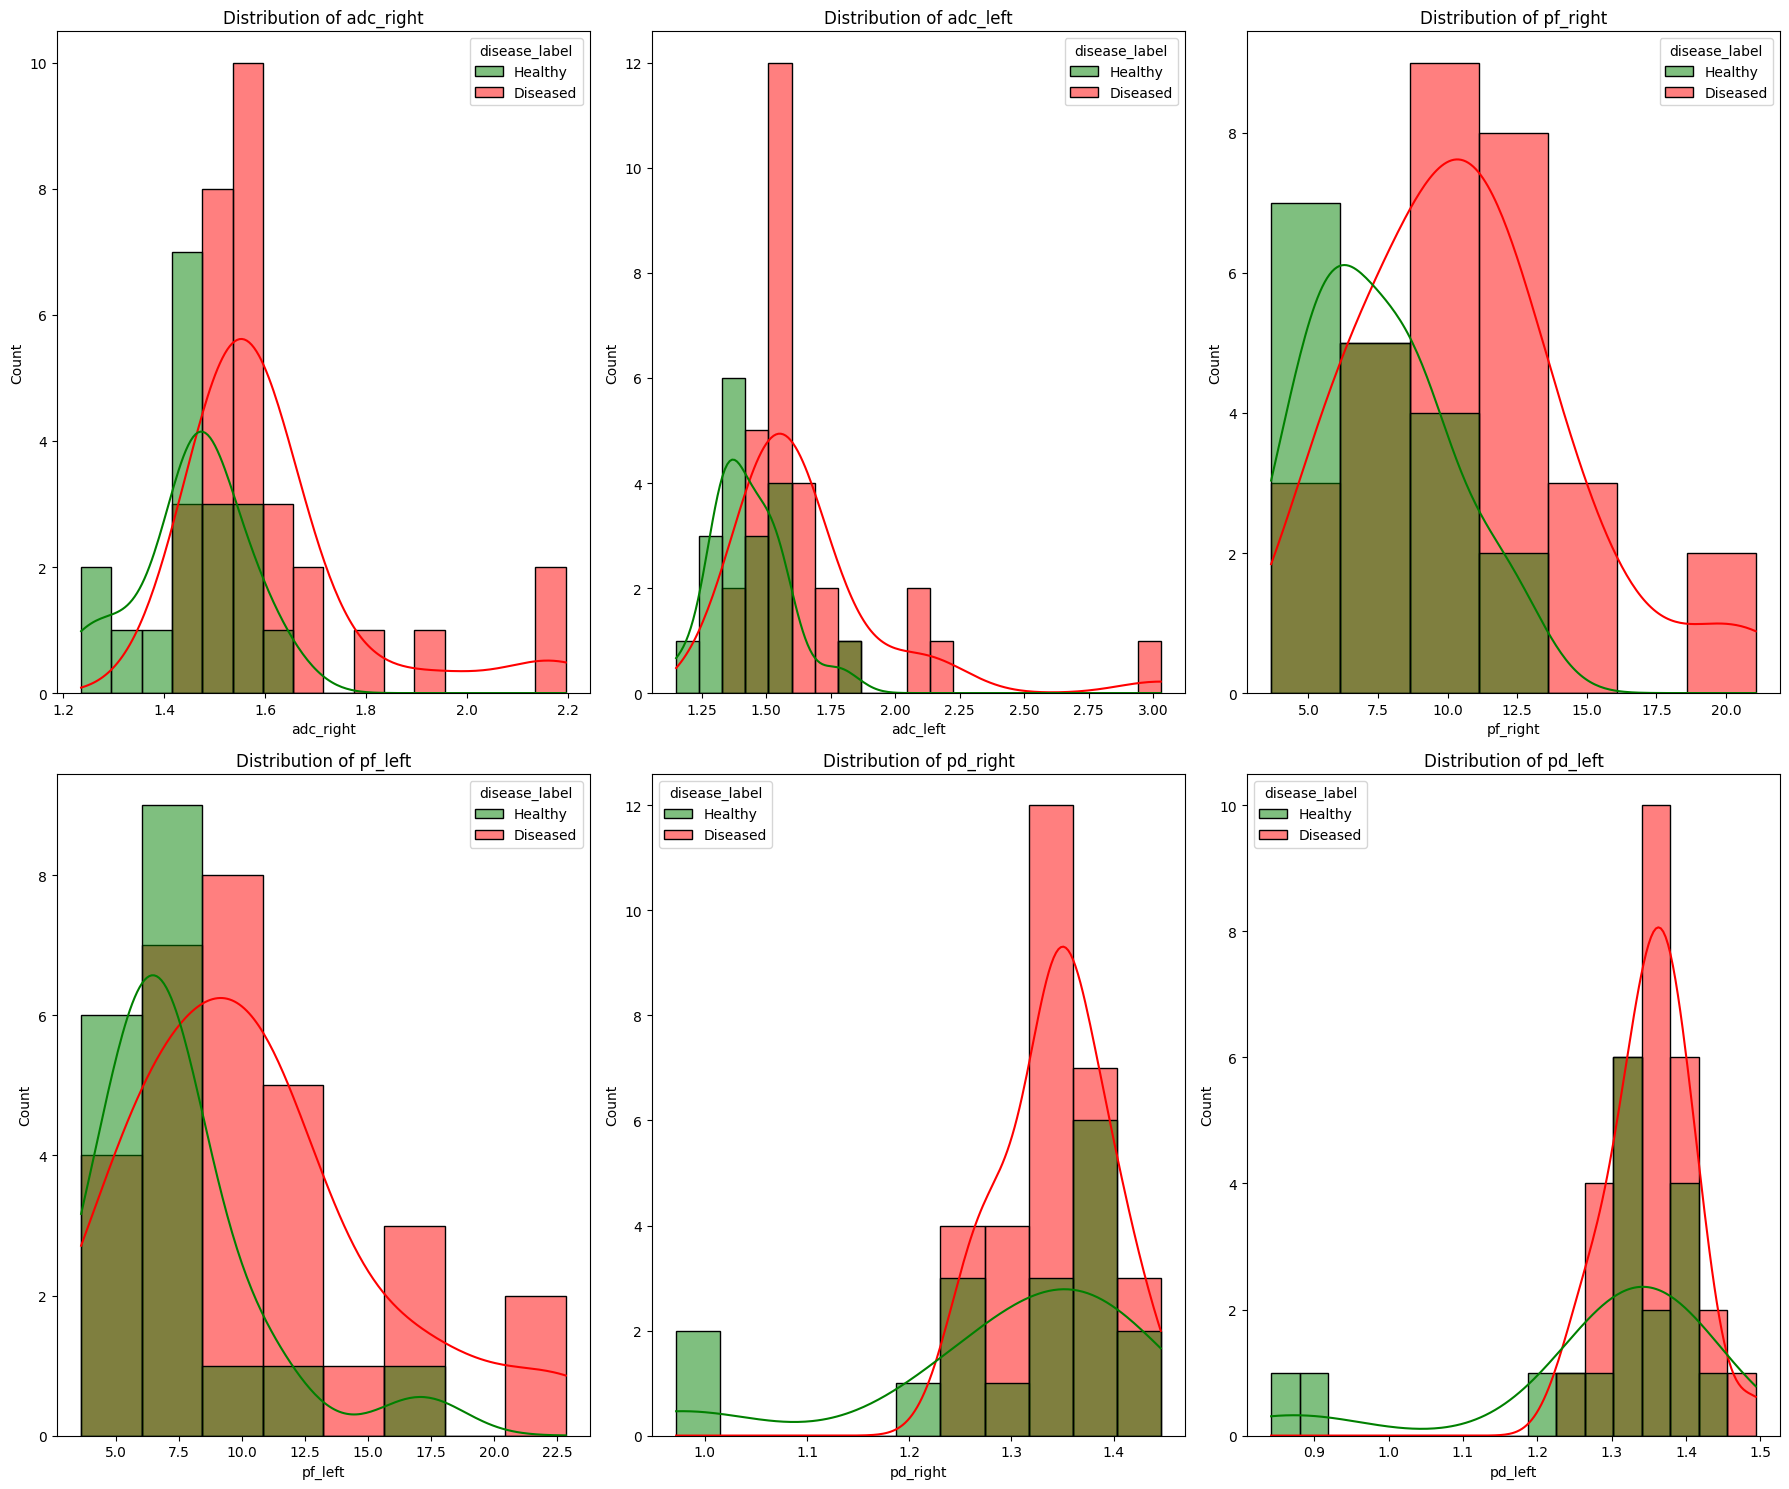

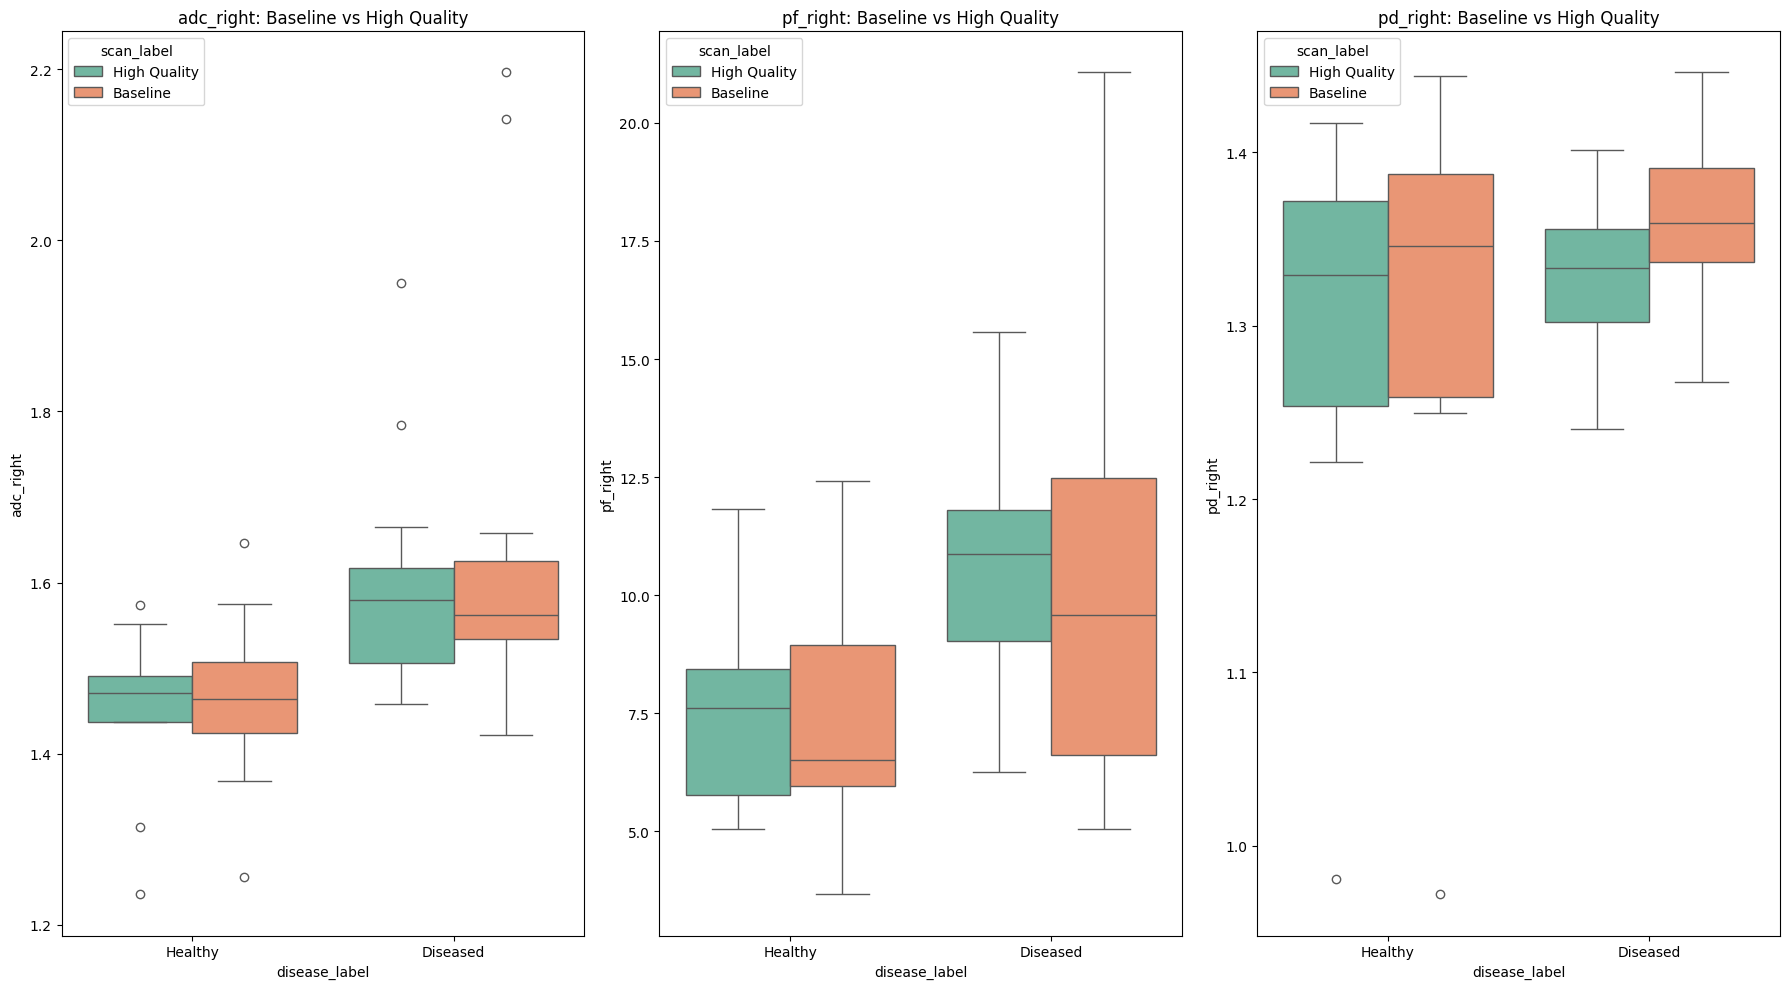

/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/1694478463.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


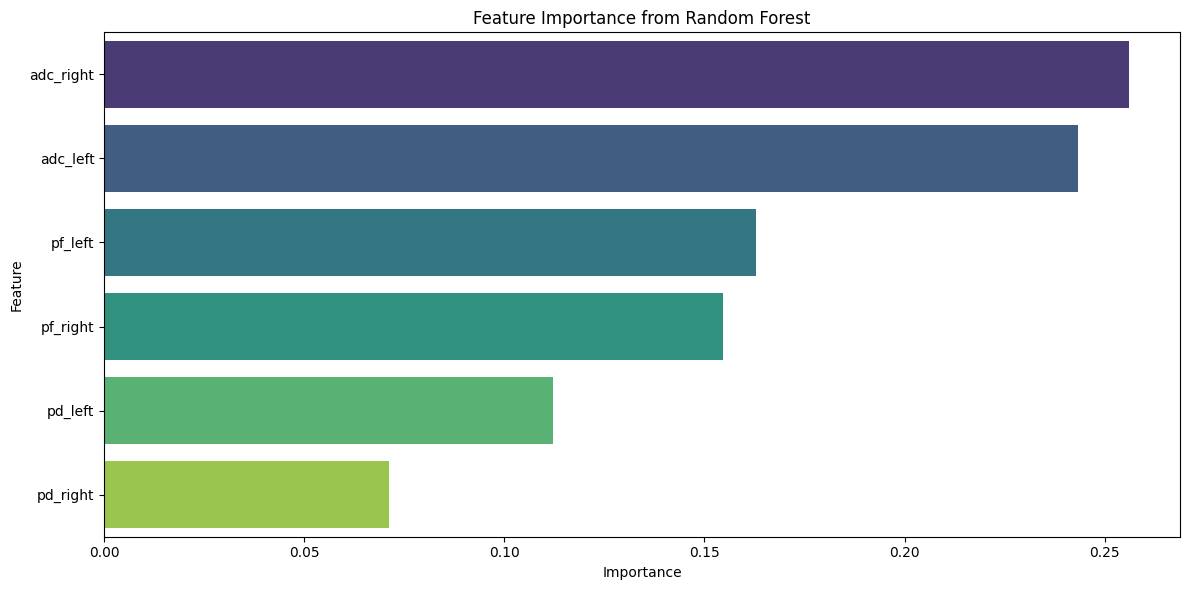

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your dataset
df = pd.read_csv('cleaned_dataset.csv')  # Replace with your actual file path

# Fix the labels to match your actual data
# In your data: disease_status 1 = healthy, 0 = diseased 
# scan_type 0 = baseline, 1 = high quality
df['disease_label'] = df['disease_status'].map({1: 'Healthy', 0: 'Diseased'})
df['scan_label'] = df['scan_type'].map({0: 'Baseline', 1: 'High Quality'})

# Set up a consistent color palette
palette = {'Healthy': 'green', 'Diseased': 'red'}

# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).drop(['disease_status', 'scan_type'], axis=1)
correlation = numeric_cols.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))  # Create mask for upper triangle

sns.heatmap(correlation, 
            annot=True, 
            mask=mask,
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            annot_kws={"size": 8})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('image/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Box plots for key parameters grouped by disease status
key_features = ['adc_right', 'adc_left', 'pf_right', 'pf_left', 'pd_right', 'pd_left']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.boxplot(x='disease_label', y=feature, data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)
    axes[i].set_xlabel('')
    
    # Add statistical annotation
    healthy = df[df['disease_status'] == 1][feature]
    diseased = df[df['disease_status'] == 0][feature]
    stat, p = stats.ttest_ind(healthy, diseased, equal_var=False)
    axes[i].annotate(f'p-value: {p:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', 
                     ha='center', fontsize=10, 
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.tight_layout()
plt.savefig('image/boxplots_by_disease.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Scatter plots to visualize separation between groups
plt.figure(figsize=(18, 15))

# Create pairs of important features
feature_pairs = [
    ('adc_right', 'pf_right'),
    ('adc_right', 'pd_right'),
    ('pf_right', 'pd_right'),
    ('adc_left', 'pf_left'),
    ('adc_left', 'pd_left'),
    ('pf_left', 'pd_left')
]

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=x_feature, y=y_feature, hue='disease_label', data=df, palette=palette, s=100)
    plt.title(f'{x_feature} vs {y_feature}')
    plt.tight_layout()

plt.savefig('image/scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Distribution plots for each feature
plt.figure(figsize=(18, 15))

for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=feature, hue='disease_label', kde=True, palette=palette)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.savefig('image/distribution_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Box plots comparing baseline vs. high quality measurements
plt.figure(figsize=(18, 10))

for i, feature in enumerate(['adc_right', 'pf_right', 'pd_right']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='disease_label', y=feature, hue='scan_label', data=df, palette='Set2')
    plt.title(f'{feature}: Baseline vs High Quality')
    plt.tight_layout()

plt.savefig('image/baseline_vs_highquality.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Feature importance using Random Forest for preliminary assessment
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Use numeric columns except patient_id, disease_status, and scan_type
X = df.select_dtypes(include=[np.number]).drop(['disease_status', 'scan_type'], axis=1)
y = df['disease_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Plot feature importances
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig('image/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Exploring Baseline and High quality for Pf values

/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/2437746824.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y='pf_right', data=df[df['scan_type'] == 0],
/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/2437746824.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y='pf_right', data=df[df['scan_type'] == 1],
/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/2437746824.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y='pf_left', 

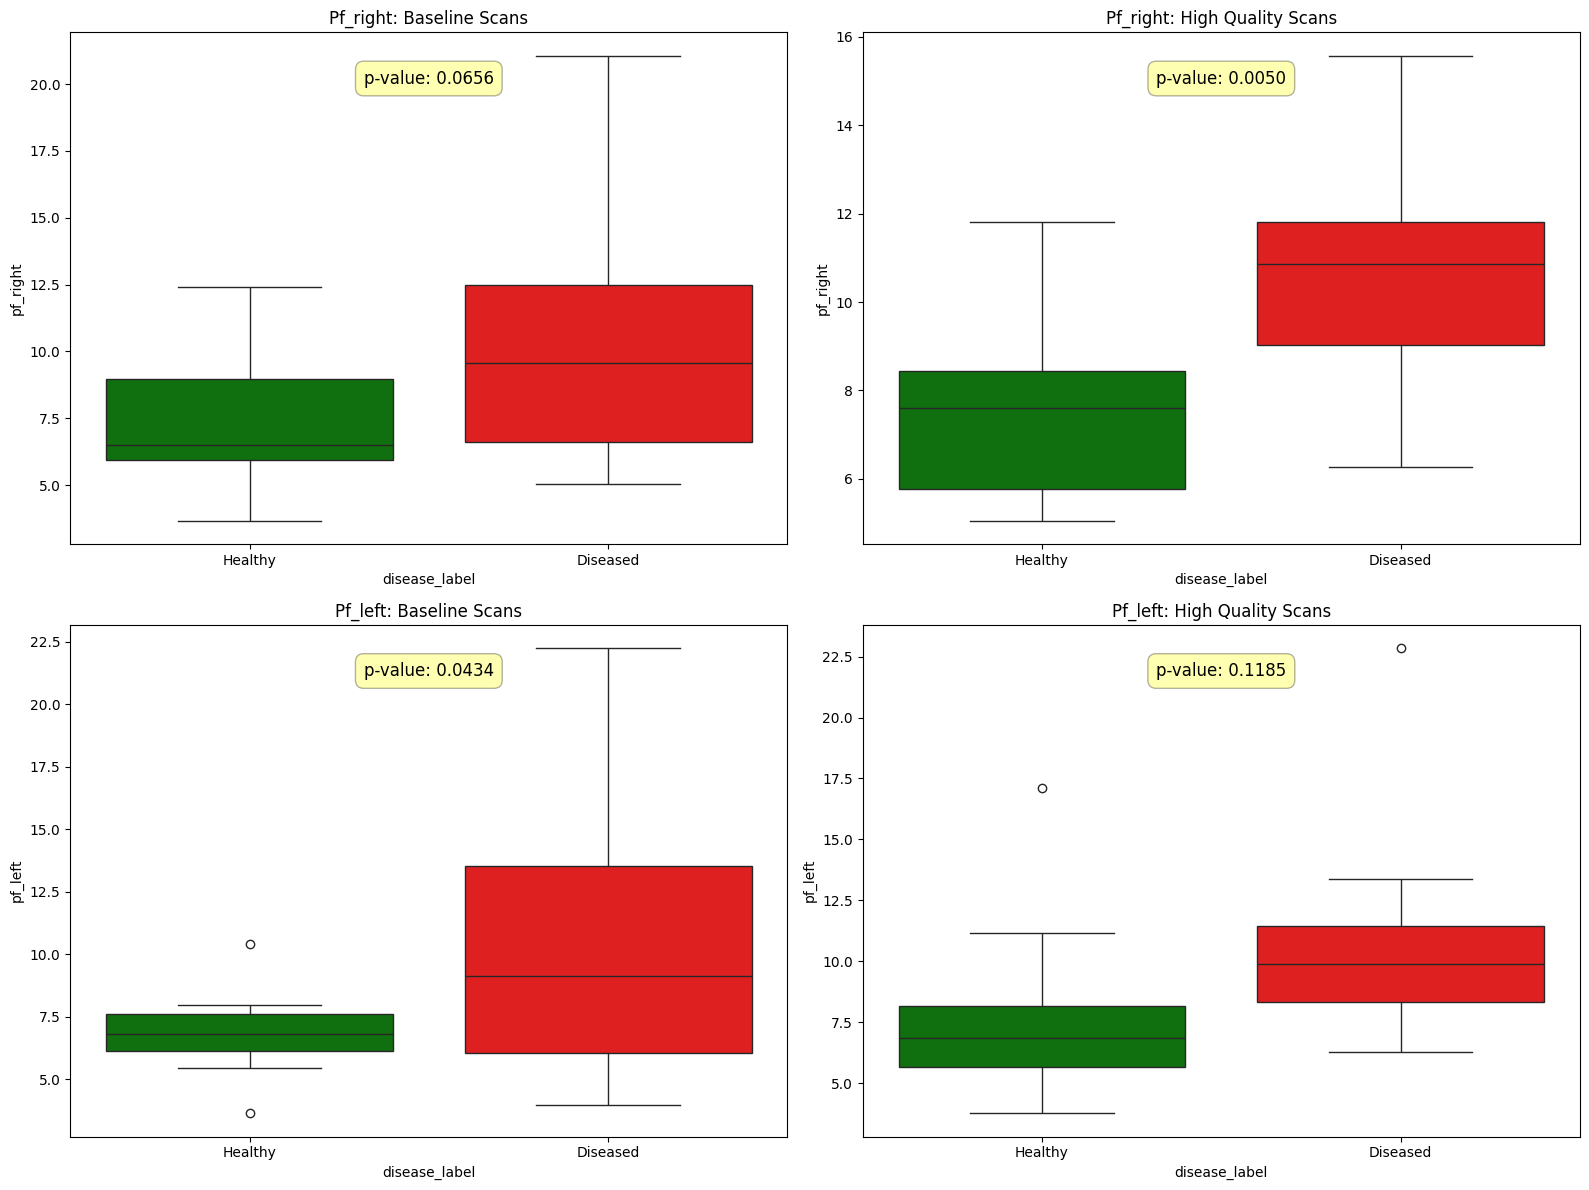

/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/2437746824.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y='pf_right_diff', data=paired_df,
/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/2437746824.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y='pf_left_diff', data=paired_df,


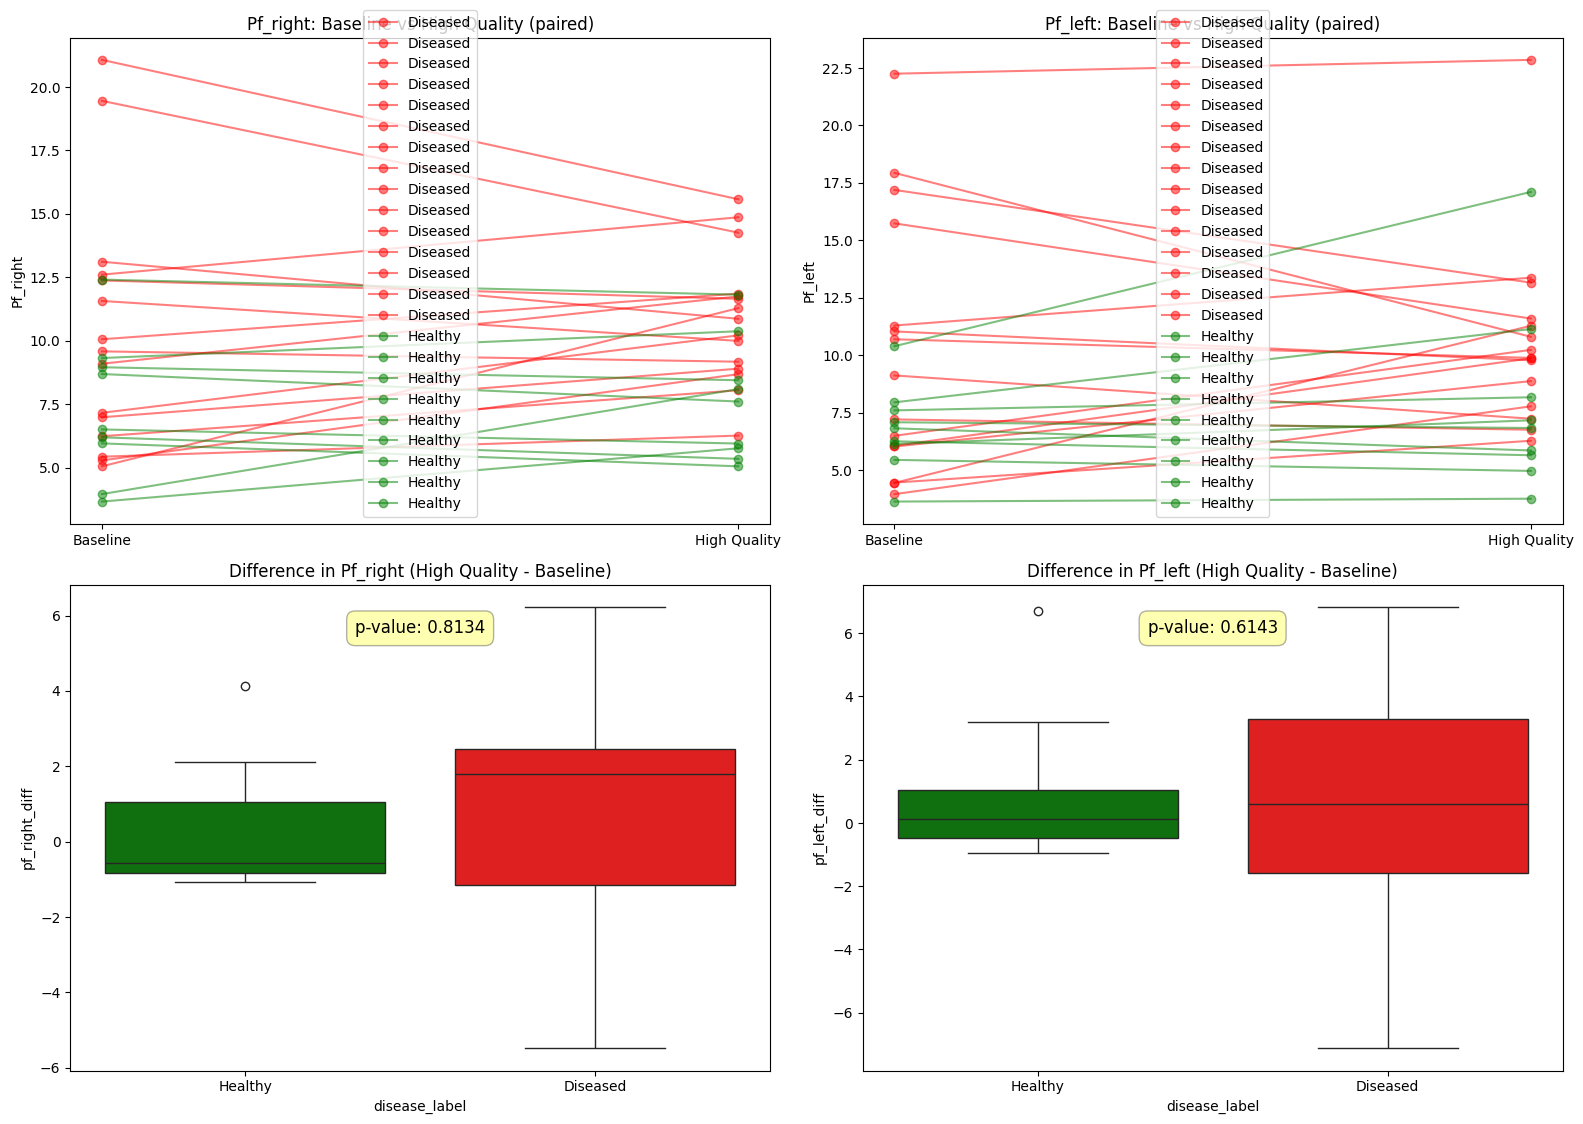

Correlation between baseline and high quality measurements:
Pf_right: 0.8014
Pf_left: 0.7496

Statistical tests for each scan type:

Baseline scans:
Pf_right p-value: 0.0656
Pf_left p-value: 0.0434

High Quality scans:
Pf_right p-value: 0.0050
Pf_left p-value: 0.1185


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your dataset
df = pd.read_csv('cleaned_dataset.csv')  # Replace with your actual file path

# Create labels for visualization
df['disease_label'] = df['disease_status'].map({1: 'Healthy', 0: 'Diseased'})
df['scan_label'] = df['scan_type'].map({0: 'Baseline', 1: 'High Quality'})

# 1. Separate plots for Pf right and Pf left by scan type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Pf_right - Baseline
sns.boxplot(x='disease_label', y='pf_right', data=df[df['scan_type'] == 0], 
            ax=axes[0, 0], palette={'Healthy': 'green', 'Diseased': 'red'})
axes[0, 0].set_title('Pf_right: Baseline Scans')
# Add p-value
healthy = df[(df['disease_status'] == 1) & (df['scan_type'] == 0)]['pf_right']
diseased = df[(df['disease_status'] == 0) & (df['scan_type'] == 0)]['pf_right']
stat, p = stats.ttest_ind(healthy, diseased, equal_var=False)
axes[0, 0].annotate(f'p-value: {p:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', 
                  ha='center', fontsize=12, 
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Pf_right - High Quality
sns.boxplot(x='disease_label', y='pf_right', data=df[df['scan_type'] == 1], 
            ax=axes[0, 1], palette={'Healthy': 'green', 'Diseased': 'red'})
axes[0, 1].set_title('Pf_right: High Quality Scans')
# Add p-value
healthy = df[(df['disease_status'] == 1) & (df['scan_type'] == 1)]['pf_right']
diseased = df[(df['disease_status'] == 0) & (df['scan_type'] == 1)]['pf_right']
stat, p = stats.ttest_ind(healthy, diseased, equal_var=False)
axes[0, 1].annotate(f'p-value: {p:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', 
                  ha='center', fontsize=12, 
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Pf_left - Baseline
sns.boxplot(x='disease_label', y='pf_left', data=df[df['scan_type'] == 0], 
            ax=axes[1, 0], palette={'Healthy': 'green', 'Diseased': 'red'})
axes[1, 0].set_title('Pf_left: Baseline Scans')
# Add p-value
healthy = df[(df['disease_status'] == 1) & (df['scan_type'] == 0)]['pf_left']
diseased = df[(df['disease_status'] == 0) & (df['scan_type'] == 0)]['pf_left']
stat, p = stats.ttest_ind(healthy, diseased, equal_var=False)
axes[1, 0].annotate(f'p-value: {p:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', 
                  ha='center', fontsize=12, 
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Pf_left - High Quality
sns.boxplot(x='disease_label', y='pf_left', data=df[df['scan_type'] == 1], 
            ax=axes[1, 1], palette={'Healthy': 'green', 'Diseased': 'red'})
axes[1, 1].set_title('Pf_left: High Quality Scans')
# Add p-value
healthy = df[(df['disease_status'] == 1) & (df['scan_type'] == 1)]['pf_left']
diseased = df[(df['disease_status'] == 0) & (df['scan_type'] == 1)]['pf_left']
stat, p = stats.ttest_ind(healthy, diseased, equal_var=False)
axes[1, 1].annotate(f'p-value: {p:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', 
                  ha='center', fontsize=12, 
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.tight_layout()
plt.savefig('image/pf_scan_quality_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Paired plot to show how values change between baseline and high quality
# Create a new dataframe for paired data analysis
patient_ids = df['patient_id'].unique()
paired_data = []

for patient in patient_ids:
    baseline = df[(df['patient_id'] == patient) & (df['scan_type'] == 0)]
    high_quality = df[(df['patient_id'] == patient) & (df['scan_type'] == 1)]
    
    if len(baseline) > 0 and len(high_quality) > 0:
        paired_data.append({
            'patient_id': patient,
            'disease_status': baseline['disease_status'].iloc[0],
            'disease_label': baseline['disease_label'].iloc[0],
            'pf_right_baseline': baseline['pf_right'].iloc[0],
            'pf_right_high_quality': high_quality['pf_right'].iloc[0],
            'pf_left_baseline': baseline['pf_left'].iloc[0],
            'pf_left_high_quality': high_quality['pf_left'].iloc[0],
            'pf_right_diff': high_quality['pf_right'].iloc[0] - baseline['pf_right'].iloc[0],
            'pf_left_diff': high_quality['pf_left'].iloc[0] - baseline['pf_left'].iloc[0],
        })

paired_df = pd.DataFrame(paired_data)

# Paired plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Pf_right paired plot
for i, group in paired_df.groupby('disease_label'):
    axes[0, 0].plot([0, 1], [group['pf_right_baseline'], group['pf_right_high_quality']], 
                  'o-', alpha=0.5, label=i,
                  color='green' if i == 'Healthy' else 'red')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Baseline', 'High Quality'])
axes[0, 0].set_ylabel('Pf_right')
axes[0, 0].set_title('Pf_right: Baseline vs High Quality (paired)')
axes[0, 0].legend()

# Pf_left paired plot
for i, group in paired_df.groupby('disease_label'):
    axes[0, 1].plot([0, 1], [group['pf_left_baseline'], group['pf_left_high_quality']], 
                  'o-', alpha=0.5, label=i,
                  color='green' if i == 'Healthy' else 'red')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Baseline', 'High Quality'])
axes[0, 1].set_ylabel('Pf_left')
axes[0, 1].set_title('Pf_left: Baseline vs High Quality (paired)')
axes[0, 1].legend()

# Box plot of differences by disease status
sns.boxplot(x='disease_label', y='pf_right_diff', data=paired_df, 
            ax=axes[1, 0], palette={'Healthy': 'green', 'Diseased': 'red'})
axes[1, 0].set_title('Difference in Pf_right (High Quality - Baseline)')
# Add p-value for difference
stat, p = stats.ttest_ind(
    paired_df[paired_df['disease_status'] == 1]['pf_right_diff'],
    paired_df[paired_df['disease_status'] == 0]['pf_right_diff'],
    equal_var=False
)
axes[1, 0].annotate(f'p-value: {p:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', 
                  ha='center', fontsize=12, 
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

sns.boxplot(x='disease_label', y='pf_left_diff', data=paired_df, 
            ax=axes[1, 1], palette={'Healthy': 'green', 'Diseased': 'red'})
axes[1, 1].set_title('Difference in Pf_left (High Quality - Baseline)')
# Add p-value for difference
stat, p = stats.ttest_ind(
    paired_df[paired_df['disease_status'] == 1]['pf_left_diff'],
    paired_df[paired_df['disease_status'] == 0]['pf_left_diff'],
    equal_var=False
)
axes[1, 1].annotate(f'p-value: {p:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', 
                  ha='center', fontsize=12, 
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.tight_layout()
plt.savefig('image/pf_paired_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Calculate correlation between baseline and high quality measurements
print("Correlation between baseline and high quality measurements:")
print(f"Pf_right: {paired_df['pf_right_baseline'].corr(paired_df['pf_right_high_quality']):.4f}")
print(f"Pf_left: {paired_df['pf_left_baseline'].corr(paired_df['pf_left_high_quality']):.4f}")

# 4. Statistical tests for scan quality effect
print("\nStatistical tests for each scan type:")
for scan_type, scan_name in [(0, "Baseline"), (1, "High Quality")]:
    healthy_right = df[(df['disease_status'] == 1) & (df['scan_type'] == scan_type)]['pf_right']
    diseased_right = df[(df['disease_status'] == 0) & (df['scan_type'] == scan_type)]['pf_right']
    stat_right, p_right = stats.ttest_ind(healthy_right, diseased_right, equal_var=False)
    
    healthy_left = df[(df['disease_status'] == 1) & (df['scan_type'] == scan_type)]['pf_left']
    diseased_left = df[(df['disease_status'] == 0) & (df['scan_type'] == scan_type)]['pf_left']
    stat_left, p_left = stats.ttest_ind(healthy_left, diseased_left, equal_var=False)
    
    print(f"\n{scan_name} scans:")
    print(f"Pf_right p-value: {p_right:.4f}")
    print(f"Pf_left p-value: {p_left:.4f}")

Created combined dataset with 24 patients and 38 features
First few rows of the combined dataset:
  patient_id  disease_status  adc_right_baseline  adc_right_high_quality  \
0    PMRI001               1            1.645657                1.574218   
1    PMRI002               1            1.469758                1.470430   
2    PMRI003               1            1.574756                1.551725   
3    PMRI004               1            1.456370                1.485873   
4    PMRI005               1            1.507311                1.456630   

   adc_right_diff  adc_right_ratio  adc_right_avg  adc_right_weighted  \
0       -0.071439         0.956589       1.609938            1.609938   
1        0.000672         1.000457       1.470094            1.470094   
2       -0.023031         0.985375       1.563241            1.563241   
3        0.029503         1.020258       1.471121            1.471121   
4       -0.050681         0.966376       1.481970            1.481970   

   adc

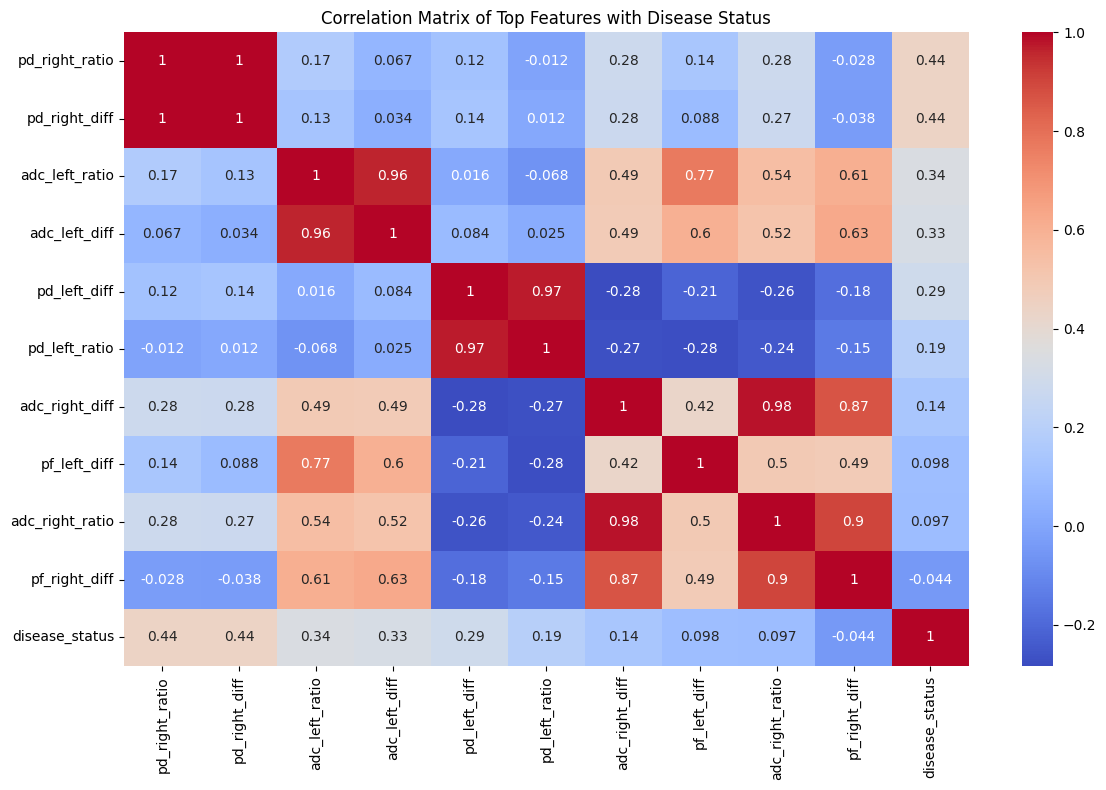

/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/871588074.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y=feature, data=combined_df,
/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/871588074.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y=feature, data=combined_df,
/var/folders/g9/fqm6b51s7dq_fslw71ptw84c0000gn/T/ipykernel_54203/871588074.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_label', y=feature, data=combined_df,
/var/folders/g9/fqm

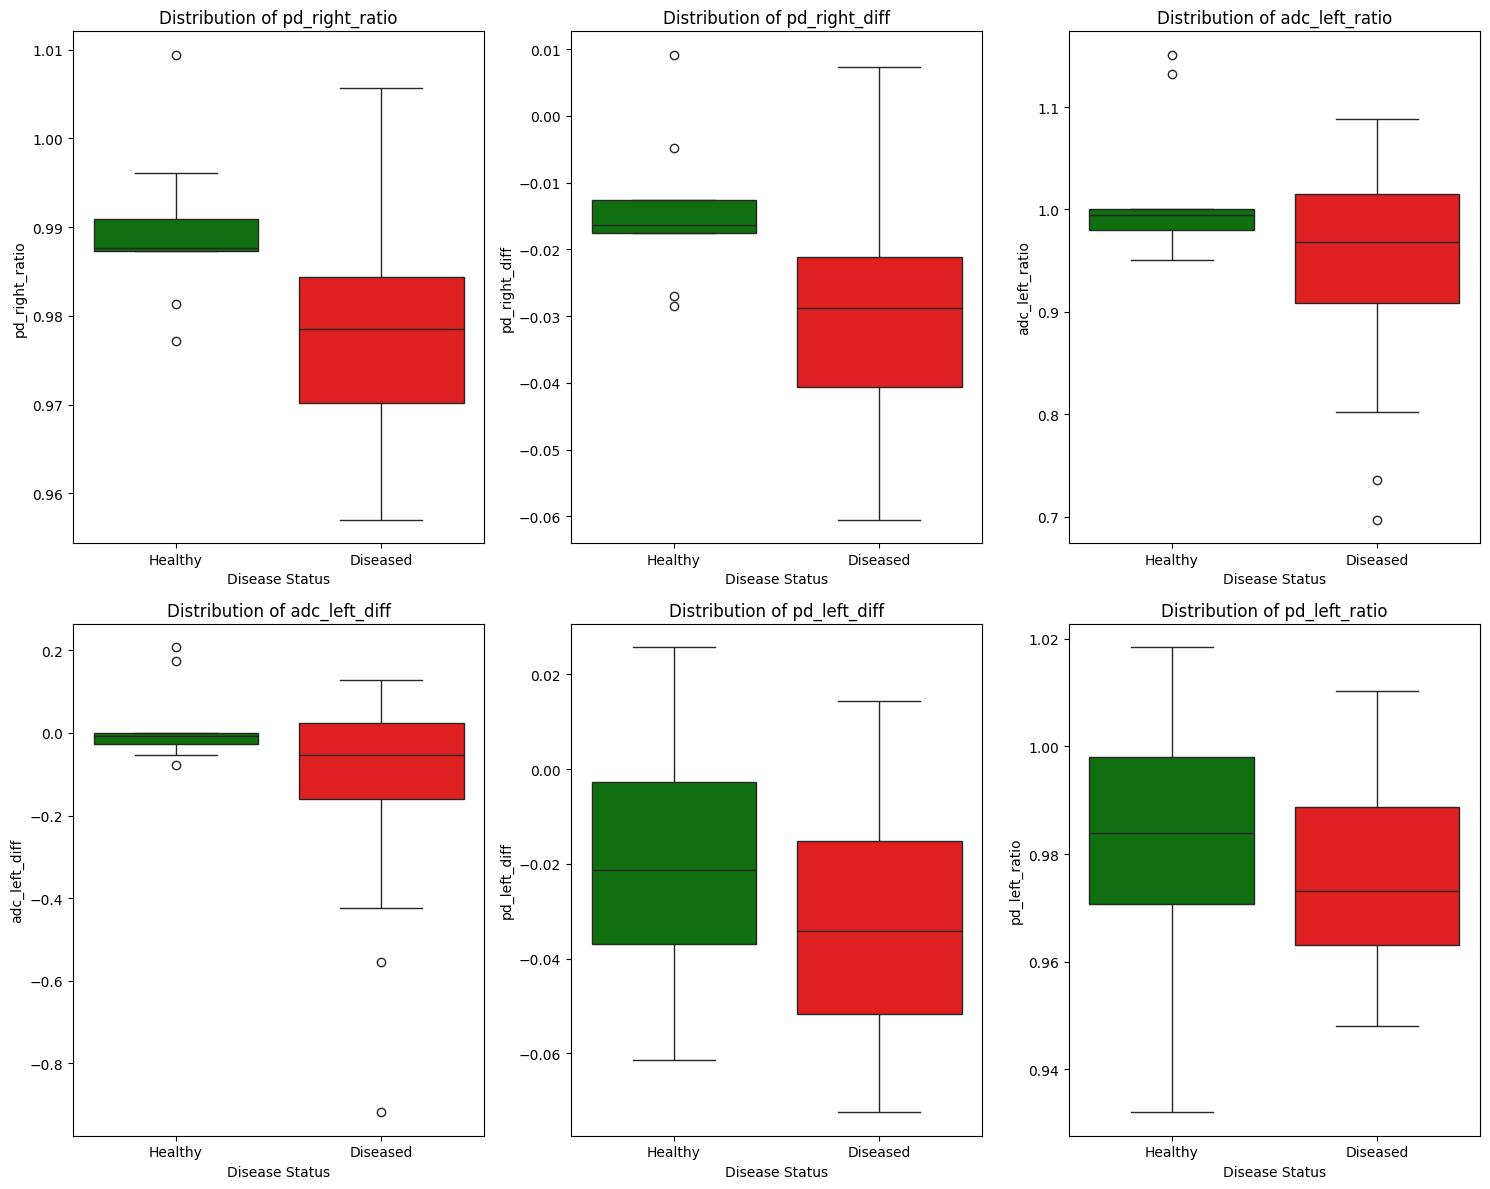

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('cleaned_dataset.csv')  # Replace with your actual file path

# Create patient-level dataframe by pivoting the data
# First, let's create a combined ID with patient and scan type
df['scan_id'] = df['scan_type'].map({0: 'baseline', 1: 'high_quality'})
df['feature_id'] = df['patient_id'] + '_' + df['scan_id']

# Create a dictionary to hold the combined dataset
combined_data = {}

# Iterate through patients
for patient in df['patient_id'].unique():
    patient_data = {'patient_id': patient}
    
    # Get disease status (should be the same for all scans of a patient)
    patient_data['disease_status'] = df[df['patient_id'] == patient]['disease_status'].iloc[0]
    
    # Extract baseline and high-quality values for each feature
    baseline_data = df[(df['patient_id'] == patient) & (df['scan_type'] == 0)]
    highq_data = df[(df['patient_id'] == patient) & (df['scan_type'] == 1)]
    
    # Only proceed if we have both scan types
    if len(baseline_data) > 0 and len(highq_data) > 0:
        for feature in ['adc_right', 'adc_left', 'pf_right', 'pf_left', 'pd_right', 'pd_left']:
            # Store original values
            patient_data[f"{feature}_baseline"] = baseline_data[feature].iloc[0]
            patient_data[f"{feature}_high_quality"] = highq_data[feature].iloc[0]
            
            # Create combined features
            # 1. Difference
            patient_data[f"{feature}_diff"] = highq_data[feature].iloc[0] - baseline_data[feature].iloc[0]
            
            # 2. Ratio
            patient_data[f"{feature}_ratio"] = highq_data[feature].iloc[0] / baseline_data[feature].iloc[0]
            
            # 3. Average
            patient_data[f"{feature}_avg"] = (highq_data[feature].iloc[0] + baseline_data[feature].iloc[0]) / 2
            
            # 4. Weighted average (giving more weight to the better discriminating scan)
            if feature in ['pf_right']:
                # High quality is better for pf_right
                patient_data[f"{feature}_weighted"] = 0.7 * highq_data[feature].iloc[0] + 0.3 * baseline_data[feature].iloc[0]
            elif feature in ['pf_left']:
                # Baseline is better for pf_left
                patient_data[f"{feature}_weighted"] = 0.3 * highq_data[feature].iloc[0] + 0.7 * baseline_data[feature].iloc[0]
            else:
                # Equal weighting for other features
                patient_data[f"{feature}_weighted"] = 0.5 * highq_data[feature].iloc[0] + 0.5 * baseline_data[feature].iloc[0]
        
        combined_data[patient] = patient_data

# Convert to DataFrame
combined_df = pd.DataFrame(list(combined_data.values()))

# Save the combined data
combined_df.to_csv('combined_features.csv', index=False)

print(f"Created combined dataset with {len(combined_df)} patients and {combined_df.shape[1]} features")
print("First few rows of the combined dataset:")
print(combined_df.head())

# Calculate correlations between original and combined features to see which ones are most informative
correlation_with_disease = {}
for col in combined_df.columns:
    if col not in ['patient_id', 'disease_status']:
        correlation_with_disease[col] = combined_df[col].corr(combined_df['disease_status'])

# Sort and print the correlations
corr_df = pd.DataFrame(list(correlation_with_disease.items()), columns=['Feature', 'Correlation'])
corr_df = corr_df.sort_values('Correlation', ascending=False)
print("\nFeatures sorted by correlation with disease status:")
print(corr_df)

# Visualize the top 10 features
plt.figure(figsize=(12, 8))
top_features = corr_df.head(10)['Feature'].tolist()
sns.heatmap(combined_df[top_features + ['disease_status']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top Features with Disease Status')
plt.tight_layout()
plt.savefig('image/top_features_correlation.png', dpi=300)
plt.show()

# Create boxplots for the top features
# Add a categorical version of disease status for plotting
combined_df['disease_label'] = combined_df['disease_status'].map({0: 'Diseased', 1: 'Healthy'})

plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_features[:6]):  # Plot the top 6 features
    plt.subplot(2, 3, i+1)
    # Use disease_label (string) instead of disease_status (numeric)
    sns.boxplot(x='disease_label', y=feature, data=combined_df, 
               palette={'Diseased': 'red', 'Healthy': 'green'})
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Disease Status')
    
plt.tight_layout()
plt.savefig('image/top_features_boxplots.png', dpi=300)
plt.show()

# Modelling 

Top 10 features selected:
1. pf_right_high_quality: 0.5527
2. adc_right_high_quality: 0.5143
3. pf_right_weighted: 0.4935
4. adc_right_avg: 0.4708
5. adc_right_weighted: 0.4708
6. pf_right_avg: 0.4471
7. pd_right_ratio: 0.4428
8. pd_right_diff: 0.4427
9. adc_left_avg: 0.4380
10. adc_left_weighted: 0.4380

Evaluating Logistic Regression...
  Accuracy: 0.7500 (±0.4330)
  Precision: 0.2083 (±0.4061)
  Recall: 0.2083 (±0.4061)
  F1 Score: 0.2083 (±0.4061)

Evaluating Random Forest...
  Accuracy: 0.7083 (±0.4545)
  Precision: 0.1667 (±0.3727)
  Recall: 0.1667 (±0.3727)
  F1 Score: 0.1667 (±0.3727)

Evaluating SVM (Linear)...
  Accuracy: 0.7500 (±0.4330)
  Precision: 0.2083 (±0.4061)
  Recall: 0.2083 (±0.4061)
  F1 Score: 0.2083 (±0.4061)

Evaluating SVM (RBF)...
  Accuracy: 0.7083 (±0.4545)
  Precision: 0.1667 (±0.3727)
  Recall: 0.1667 (±0.3727)
  F1 Score: 0.1667 (±0.3727)

Evaluating Gradient Boosting...
  Accuracy: 0.7500 (±0.4330)
  Precision: 0.2083 (±0.4061)
  Recall: 0.2083 (±0.4061

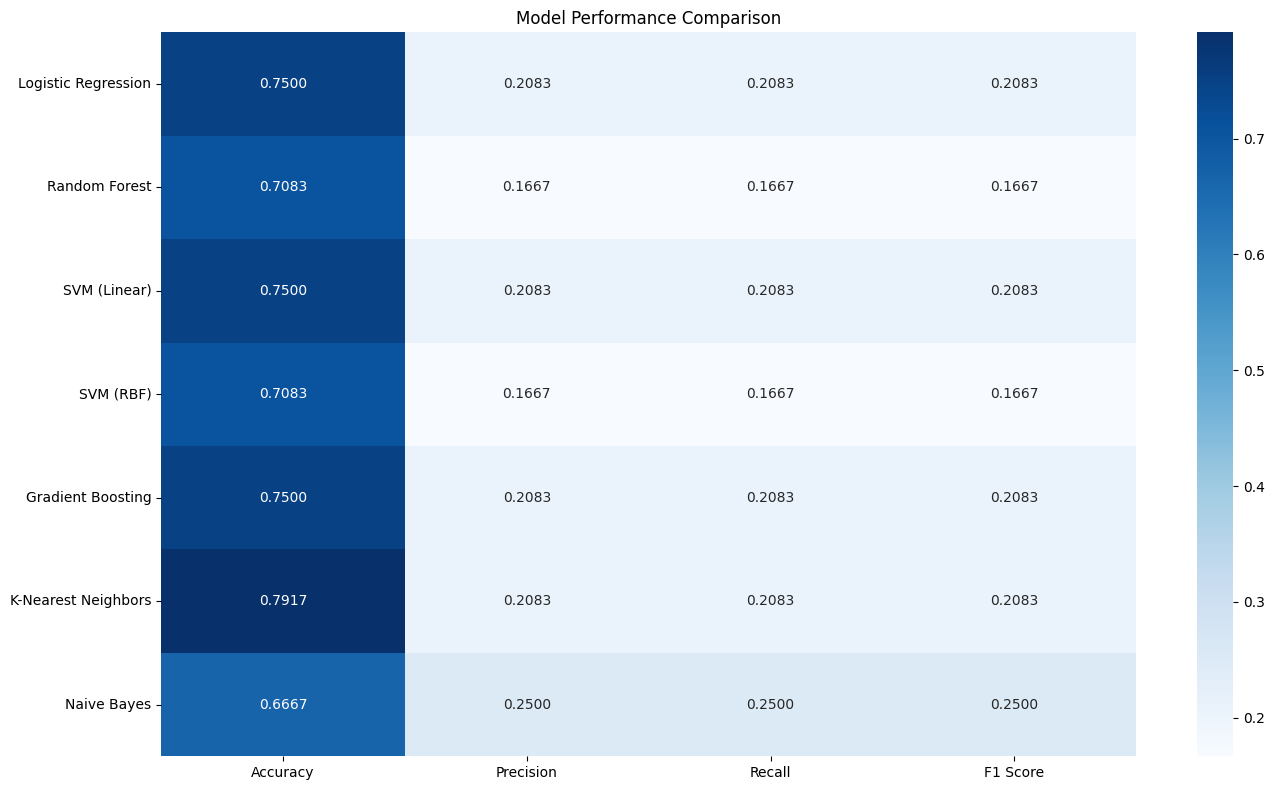

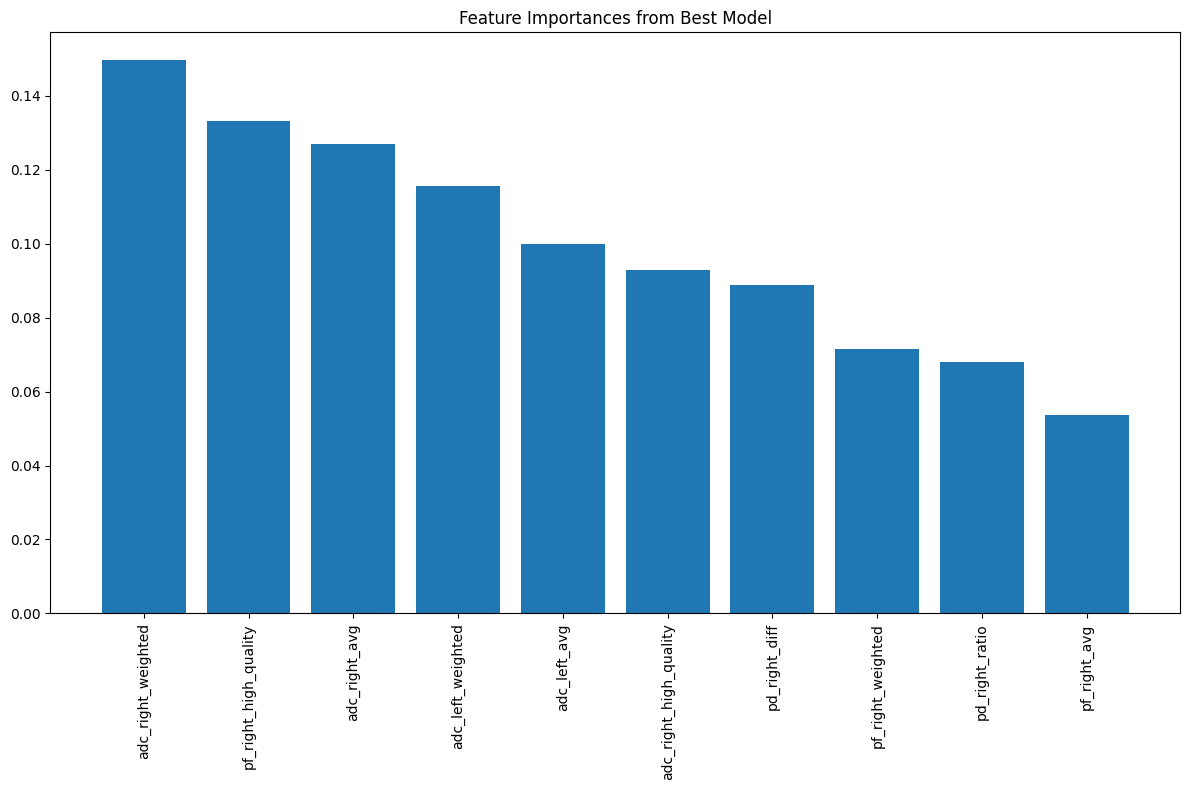

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# Load the combined dataset
combined_df = pd.read_csv('combined_features.csv')

# Separate features and target
X = combined_df.drop(['patient_id', 'disease_status', 'disease_label'], axis=1, errors='ignore')
y = combined_df['disease_status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Select top 10 features based on correlation with disease status
correlation_with_disease = {}
for col in X.columns:
    correlation_with_disease[col] = abs(X[col].corr(y))  # Using absolute correlation

# Get top features
corr_df = pd.DataFrame(list(correlation_with_disease.items()), columns=['Feature', 'Correlation'])
corr_df = corr_df.sort_values('Correlation', ascending=False)
top_features = corr_df.head(10)['Feature'].tolist()

print("Top 10 features selected:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}: {correlation_with_disease[feature]:.4f}")

# Create feature set with only top features
X_top = X_scaled_df[top_features]

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB()
}

# Metrics to evaluate
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Use Leave-One-Out Cross-Validation (LOOCV) due to small sample size
cv = LeaveOneOut()

# Dictionary to store results
results = {}

# Evaluate each model with LOOCV
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Get cross-validated scores
    cv_results = cross_validate(model, X_top, y, cv=cv, scoring=scoring)
    
    # Store results
    results[name] = {
        'accuracy': cv_results['test_accuracy'].mean(),
        'precision': cv_results['test_precision'].mean(),
        'recall': cv_results['test_recall'].mean(),
        'f1': cv_results['test_f1'].mean(),
        'accuracy_std': cv_results['test_accuracy'].std(),
        'precision_std': cv_results['test_precision'].std(),
        'recall_std': cv_results['test_recall'].std(),
        'f1_std': cv_results['test_f1'].std(),
    }
    
    print(f"  Accuracy: {results[name]['accuracy']:.4f} (±{results[name]['accuracy_std']:.4f})")
    print(f"  Precision: {results[name]['precision']:.4f} (±{results[name]['precision_std']:.4f})")
    print(f"  Recall: {results[name]['recall']:.4f} (±{results[name]['recall_std']:.4f})")
    print(f"  F1 Score: {results[name]['f1']:.4f} (±{results[name]['f1_std']:.4f})")

# Create a results DataFrame for easy comparison
results_df = pd.DataFrame({
    model_name: {
        'Accuracy': f"{results[model_name]['accuracy']:.4f} (±{results[model_name]['accuracy_std']:.4f})",
        'Precision': f"{results[model_name]['precision']:.4f} (±{results[model_name]['precision_std']:.4f})",
        'Recall': f"{results[model_name]['recall']:.4f} (±{results[model_name]['recall_std']:.4f})",
        'F1 Score': f"{results[model_name]['f1']:.4f} (±{results[model_name]['f1_std']:.4f})",
    } for model_name in models.keys()
})

# Transpose for better readability
results_df = results_df.T
print("\nModel Comparison:")
print(results_df)

# Extract just the mean values for plotting
plot_results = pd.DataFrame({
    model_name: {
        'Accuracy': results[model_name]['accuracy'],
        'Precision': results[model_name]['precision'],
        'Recall': results[model_name]['recall'],
        'F1 Score': results[model_name]['f1'],
    } for model_name in models.keys()
})

# Create a heatmap for model comparison
plt.figure(figsize=(14, 8))
sns.heatmap(plot_results.T, annot=True, cmap='Blues', fmt='.4f')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.savefig('image/model_comparison.png', dpi=300)
plt.show()

# Feature importance analysis for the best performing model
# We'll use Random Forest as an example (you can replace with the best model from your results)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_top, y)

# Plot feature importances if the model supports it
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances from Best Model')
    plt.bar(range(X_top.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_top.shape[1]), [X_top.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.savefig('image/feature_importances.png', dpi=300)
    plt.show()
elif isinstance(best_model, LogisticRegression):
    # For logistic regression, we can look at coefficients
    coef = best_model.coef_[0]
    indices = np.argsort(np.abs(coef))[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Coefficients from Logistic Regression')
    plt.bar(range(X_top.shape[1]), coef[indices], align='center')
    plt.xticks(range(X_top.shape[1]), [X_top.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.savefig('image/feature_coefficients.png', dpi=300)
    plt.show()

# Save full results to CSV
results_df.to_csv('model_comparison_results.csv')

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Load the combined dataset
combined_df = pd.read_csv('combined_features.csv')

# Separate features and target
X = combined_df.drop(['patient_id', 'disease_status', 'disease_label'], axis=1, errors='ignore')
y = combined_df['disease_status']

# Calculate correlation with disease status to select top features
correlation_with_disease = {}
for col in X.columns:
    correlation_with_disease[col] = abs(X[col].corr(y))  # Using absolute correlation

# Get top 10 features
corr_df = pd.DataFrame(list(correlation_with_disease.items()), columns=['Feature', 'Correlation'])
corr_df = corr_df.sort_values('Correlation', ascending=False)
top_features = corr_df.head(10)['Feature'].tolist()

print("Top 10 features selected for the model:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}: {correlation_with_disease[feature]:.4f}")

# Create feature set with only top features
X_top = X[top_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

# Train the KNN model on the full dataset
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_scaled, y)

# Save all the necessary files
joblib.dump(knn_model, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(top_features, 'top_features.joblib')

print("\nModel saved successfully!")
print("Files created: knn_model.joblib, scaler.joblib, top_features.joblib")

# Test the model loading to make sure everything works
try:
    loaded_model = joblib.load('knn_model.joblib')
    loaded_scaler = joblib.load('scaler.joblib')
    loaded_features = joblib.load('top_features.joblib')
    print("\nSuccessfully loaded all saved files. Model is ready for deployment.")
except Exception as e:
    print(f"\nError testing model loading: {e}")

Top 10 features selected for the model:
1. pf_right_high_quality: 0.5527
2. adc_right_high_quality: 0.5143
3. pf_right_weighted: 0.4935
4. adc_right_avg: 0.4708
5. adc_right_weighted: 0.4708
6. pf_right_avg: 0.4471
7. pd_right_ratio: 0.4428
8. pd_right_diff: 0.4427
9. adc_left_avg: 0.4380
10. adc_left_weighted: 0.4380

Model saved successfully!
Files created: knn_model.joblib, scaler.joblib, top_features.joblib

Successfully loaded all saved files. Model is ready for deployment.
